<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Estatistica_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilidade

In [2]:
import pandas as pd
notas =pd.read_csv('http://quant-ibmec.group/notas_turma%20-%20final.csv')
notas.head()

,Curso,Alunos,AP1,AP2,AP3,Nota,Conceito
0,ADM,João,9.0,8.0,9.0,8.6,B
1,ADM,Maria,6.0,4.0,10.0,6.0,D
2,DIR,José,4.0,3.0,4.0,3.6,F
3,ADM,Pedro,8.0,10.0,7.0,8.6,B
4,ECO,Paulo,7.5,8.0,9.5,8.1,B


In [ ]:
print(notas['Nota'].mean())
print(notas['Nota'].median())

7.108333333333334
7.5


In [ ]:
print(notas['Nota'].std())
print(notas['Nota'].var())

1.9251721686093113
3.7062878787878786


In [3]:
from scipy.stats import norm
x=1.8
u=1.7
o=0.1
Z= (x-u)/o
print(Z) #normalizacao
um_oitenta = norm.cdf(Z)
print(um_oitenta)

1.0000000000000009
0.8413447460685431


In [4]:
x=1.6
Z= (x-u)/o
print(Z) #normalizacao
print(norm.cdf(Z))
um_oitenta-norm.cdf(Z)

-0.9999999999999987
0.1586552539314574


0.6826894921370857

In [ ]:
x=1.9
Z= (x-u)/o
print(Z) #normalizacao
print(norm.cdf(Z))
1-norm.cdf(Z)

1.9999999999999996
0.9772498680518208


0.02275013194817921

#Amostragem

In [5]:
populacao = pd.read_csv('http://quant-ibmec.group/benchmark%20-%20ok.csv')
populacao.head()

,Estudo,Renda,UF,SEXO,COR,Idade,Altura
0,12,800,RO,M,PAR,23,1.603808
1,12,1150,RO,F,BRA,23,1.739790
2,15,880,RO,F,PAR,35,1.760444
3,6,3500,RO,M,BRA,46,1.783158
4,9,150,RO,F,PAR,47,1.690631


In [8]:
populacao['Idade'].sample(1)

10022    34
Name: Idade, dtype: int64

In [9]:
print(populacao['Idade'].mean())
amostra = populacao['Idade'].sample(100)
print(amostra.mean())

44.07142113482561
42.87


In [10]:
from numpy import sqrt, mean, std
print(populacao.shape[0])
n = 100 # tam. amostra
u_amostras = []
for i in range(1,900):
    amostra = populacao['Idade'].sample(n)
    u_amostras.append(amostra.mean())

print(populacao['Idade'].mean())
mean(u_amostras)

76840
44.07142113482561


44.02708565072303

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


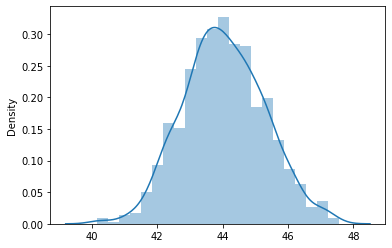

In [ ]:
import seaborn as sns
sns.distplot(u_amostras)

In [11]:
print(std(u_amostras))
populacao['Idade'].std() / sqrt(n)

1.2838172902366878


1.2480583465360187

# Nível de Confiança e Significância



Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 150 g. Selecionada uma amostra aleatório de 20 sacos de um lote específico, obteve-se um peso médio de 5.050 g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.

In [13]:
sig = 0.05
conf = 1-sig
Z =z = norm.ppf(conf+sig/2)
Z

1.959963984540054

In [14]:
devpad = 150
n =20
u = 5050
e = Z * (devpad / sqrt(n))
print(e)
print(u-e)
print(u+e)

65.73919054324361
4984.260809456757
5115.739190543243


In [16]:
print('media',u)
norm.interval(alpha = conf, loc = u, scale = devpad / sqrt(n))

media 5050


(4984.260809456757, 5115.739190543243)

#Calculando N

In [ ]:
renda_5000 = populacao[populacao['Renda'] <= 5000]
u = renda_5000['Renda'].mean()
s = renda_5000['Renda'].std()
print(u)
print(s)

1426.5372144947232
1082.794549030635


In [ ]:
#z <- qnorm(.975)
#e <- 10
#n <- (z * (s / e)) ** 2
#round(n)

In [ ]:
Z = norm.ppf(.975)
n = 500
e = Z * (s / sqrt(n))
e

94.9093829038806

In [ ]:
limite_inferior = u - (Z * s / sqrt(n))
limite_superior = u + (Z * s / sqrt(n))
print(limite_inferior)
print(limite_superior)

1331.6278315908426
1521.446597398604


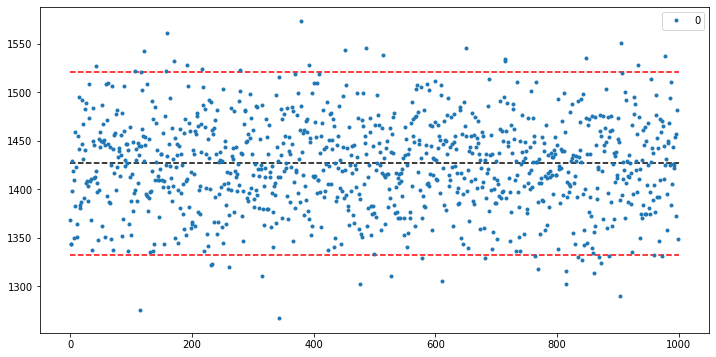

In [ ]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000['Renda'].sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = u, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = limite_inferior, xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = limite_superior, xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax